In [1]:
import pymc as pm
import arviz as az

In [3]:
model = pm.Model()

with model:
    x = pm.Binomial('x', p=0.5, n=5)

with model:
    prior_samples = pm.sample_prior_predictive(random_seed=42)

In [4]:
prior_samples

Inference data with groups:
	> prior

In [8]:
x_samples = prior_samples['prior']['x'].values
print(f'type:{type(x_samples)}')
print(f'shape:{x_samples.shape}')
print(f'values:{x_samples}')

import pandas as pd
values_counts = pd.DataFrame(x_samples.reshape(-1)).value_counts().sort_index()
print(values_counts)

type:<class 'numpy.ndarray'>
shape:(1, 500)
values:[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0

In [6]:
summary = az.summary(prior_samples, kind='stats')
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


Text(0.5, 1.0, 'ArviZによるサンプル値の可視化結果')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  func(*args, **k

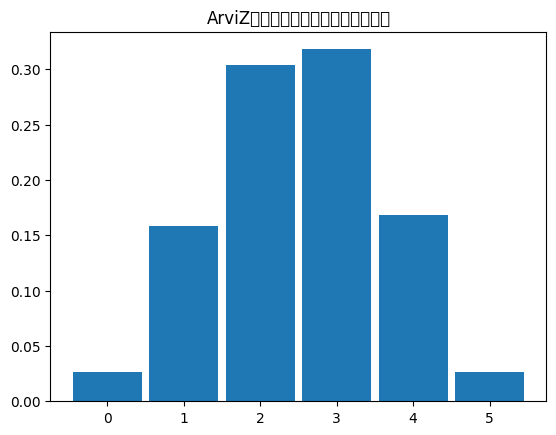

In [9]:
ax = az.plot_dist(x_samples)
ax.set_title('ArviZによるサンプル値の可視化結果')

In [12]:
model = pm.Model()

with model:
    x = pm.Binomial('x', p=0.5, n=5)
    prior_samples = pm.sample_prior_predictive(random_seed=42)

x_samples = prior_samples['prior']['x'].values